In [71]:
import pandas as pd

In [72]:
df=pd.read_csv('AQI.csv')

In [73]:
df.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Bihar,Begusarai,"Lohiyanagar, Begusarai - BSPCB",21-02-2025 14:00:00,25.42742,86.138861,NH3,11.0,17.0,12.0
1,India,Bihar,Begusarai,"Lohiyanagar, Begusarai - BSPCB",21-02-2025 14:00:00,25.42742,86.138861,SO2,3.0,124.0,47.0
2,India,Bihar,Begusarai,"Lohiyanagar, Begusarai - BSPCB",21-02-2025 14:00:00,25.42742,86.138861,OZONE,1.0,50.0,11.0
3,India,Bihar,Bettiah,"Kamalnath Nagar, Bettiah - BSPCB",21-02-2025 14:00:00,26.80365,84.519540,PM10,96.0,248.0,171.0
4,India,Bihar,Bettiah,"Kamalnath Nagar, Bettiah - BSPCB",21-02-2025 14:00:00,26.80365,84.519540,SO2,11.0,20.0,17.0


In [74]:
df.isnull().sum()

country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
pollutant_min    188
pollutant_max    188
pollutant_avg    188
dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3249 entries, 0 to 3248
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3249 non-null   object 
 1   state          3249 non-null   object 
 2   city           3249 non-null   object 
 3   station        3249 non-null   object 
 4   last_update    3249 non-null   object 
 5   latitude       3249 non-null   float64
 6   longitude      3249 non-null   float64
 7   pollutant_id   3249 non-null   object 
 8   pollutant_min  3061 non-null   float64
 9   pollutant_max  3061 non-null   float64
 10  pollutant_avg  3061 non-null   float64
dtypes: float64(5), object(6)
memory usage: 279.3+ KB


In [76]:
df['pollutant_min'].fillna(df['pollutant_min'].mean(), inplace=True)
df['pollutant_max'].fillna(df['pollutant_max'].mean(), inplace=True)
df['pollutant_avg'].fillna(df['pollutant_avg'].mean(), inplace=True)


In [77]:
df.isnull().sum()

country          0
state            0
city             0
station          0
last_update      0
latitude         0
longitude        0
pollutant_id     0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
dtype: int64

In [78]:
unique_pollutants=df['pollutant_id'].unique()
print(unique_pollutants)

['NH3' 'SO2' 'OZONE' 'PM10' 'CO' 'NO2' 'PM2.5']


In [79]:
import pandas as pd

# AQI Breakpoints (Including NH3)
aqi_breakpoints = {
    "PM2.5": [(0, 30, 0, 50), (31, 60, 51, 100), (61, 90, 101, 200), (91, 120, 201, 300), (121, 250, 301, 400)],
    "PM10": [(0, 50, 0, 50), (51, 100, 51, 100), (101, 250, 101, 200), (251, 350, 201, 300), (351, 430, 301, 400)],
    "SO2": [(0, 40, 0, 50), (41, 80, 51, 100), (81, 380, 101, 200), (381, 800, 201, 300), (801, 1600, 301, 400)],
    "NO2": [(0, 40, 0, 50), (41, 80, 51, 100), (81, 180, 101, 200), (181, 280, 201, 300), (281, 400, 301, 400)],
    "CO": [(0, 1, 0, 50), (1.1, 2, 51, 100), (2.1, 10, 101, 200), (10.1, 17, 201, 300), (17.1, 34, 301, 400)],
    "OZONE": [(0, 50, 0, 50), (51, 100, 51, 100), (101, 168, 101, 200), (169, 208, 201, 300), (209, 748, 301, 400)],
    "NH3": [(0, 200, 0, 50), (201, 400, 51, 100), (401, 800, 101, 200), (801, 1200, 201, 300), (1201, 1800, 301, 400)]  # Added NH3
}

def calculate_aqi(pollutant, concentration):
    if pollutant not in aqi_breakpoints:
        return None  # If pollutant AQI levels are not defined
    
    for c_low, c_high, i_low, i_high in aqi_breakpoints[pollutant]:
        if c_low <= concentration <= c_high:
            return ((i_high - i_low) / (c_high - c_low)) * (concentration - c_low) + i_low
    return None  # If out of range

# Load dataset
df = pd.read_csv('AQI.csv')

# Calculate AQI for each pollutant, including NH3
df["AQI"] = df.apply(lambda row: calculate_aqi(row["pollutant_id"], row["pollutant_avg"]), axis=1)

# Get the highest AQI per station
df_aqi = df.groupby(["station", "last_update"])["AQI"].max().reset_index()

# Display AQI values
print(df_aqi)


                               station          last_update         AQI
0           32Bungalows, Bhilai - CECB  21-02-2025 14:00:00  376.568047
1                 AIIMS, Raipur - CECB  21-02-2025 14:00:00  138.551724
2         Adarsh Nagar, Jaipur - RSPCB  21-02-2025 14:00:00  169.275862
3           Airport Area, Indore - IMC  21-02-2025 14:00:00  174.936709
4    Alandur Bus Depot, Chennai - CPCB  21-02-2025 14:00:00   61.137931
..                                 ...                  ...         ...
482               Worli, Mumbai - MPCB  21-02-2025 14:00:00  200.000000
483   Yamunapuram, Bulandshahr - UPPCB  21-02-2025 14:00:00   83.103448
484    Yerramukkapalli, Kadapa - APPCB  21-02-2025 14:00:00  131.724138
485   Zero Point GICI, Gangtok - SSPCB  21-02-2025 14:00:00  214.655172
486        Zoo Park, Hyderabad - TSPCB  21-02-2025 14:00:00  245.379310

[487 rows x 3 columns]


In [80]:
df.isnull().sum()

country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
pollutant_min    188
pollutant_max    188
pollutant_avg    188
AQI              407
dtype: int64

In [81]:
import pandas as pd

# Fill missing values in pollutant-related columns with mean
df['pollutant_min'].fillna(df['pollutant_min'].mean(), inplace=True)
df['pollutant_max'].fillna(df['pollutant_max'].mean(), inplace=True)
df['pollutant_avg'].fillna(df['pollutant_avg'].mean(), inplace=True)

# Fill missing values in AQI with median (since AQI might have outliers)
df['AQI'].fillna(df['AQI'].median(), inplace=True)

# Verify missing values are fixed
print(df.isnull().sum())


country          0
state            0
city             0
station          0
last_update      0
latitude         0
longitude        0
pollutant_id     0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
AQI              0
dtype: int64


In [82]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns
num_cols = ['pollutant_min', 'pollutant_max', 'pollutant_avg', 'latitude', 'longitude']

# Initializing StandardScaler
scaler = StandardScaler()

# Applying Standardization
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()


,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,AQI
0,India,Bihar,Begusarai,"Lohiyanagar, Begusarai - BSPCB",21-02-2025 14:00:00,0.569993,1.522069,NH3,-0.507722,-0.793731,-0.769351,3.000000
1,India,Bihar,Begusarai,"Lohiyanagar, Begusarai - BSPCB",21-02-2025 14:00:00,0.569993,1.522069,SO2,-0.832372,0.616121,0.074876,58.538462
2,India,Bihar,Begusarai,"Lohiyanagar, Begusarai - BSPCB",21-02-2025 14:00:00,0.569993,1.522069,OZONE,-0.913534,-0.358917,-0.793472,11.000000
3,India,Bihar,Bettiah,"Kamalnath Nagar, Bettiah - BSPCB",21-02-2025 14:00:00,0.817516,1.190632,PM10,2.941679,2.249969,3.065853,147.510067
4,India,Bihar,Bettiah,"Kamalnath Nagar, Bettiah - BSPCB",21-02-2025 14:00:00,0.817516,1.190632,SO2,-0.507722,-0.754202,-0.648747,21.250000


In [83]:
df = pd.get_dummies(df, columns=['pollutant_id', 'state', 'city', 'station'], drop_first=True)


In [84]:
df.head()

,country,last_update,latitude,longitude,pollutant_min,pollutant_max,pollutant_avg,AQI,pollutant_id_NH3,pollutant_id_NO2,...,"station_Vile Parle West, Mumbai - MPCB","station_Vinoba Nagara, Shivamogga - KSPCB","station_Vivek Vihar, Delhi - DPCC","station_Ward-32 Bapupara, Siliguri - WBPCB","station_Wazirpur, Delhi - DPCC","station_Worli, Mumbai - MPCB","station_Yamunapuram, Bulandshahr - UPPCB","station_Yerramukkapalli, Kadapa - APPCB","station_Zero Point GICI, Gangtok - SSPCB","station_Zoo Park, Hyderabad - TSPCB"
0,India,21-02-2025 14:00:00,0.569993,1.522069,-0.507722,-0.793731,-0.769351,3.000000,1,0,...,0,0,0,0,0,0,0,0,0,0
1,India,21-02-2025 14:00:00,0.569993,1.522069,-0.832372,0.616121,0.074876,58.538462,0,0,...,0,0,0,0,0,0,0,0,0,0
2,India,21-02-2025 14:00:00,0.569993,1.522069,-0.913534,-0.358917,-0.793472,11.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,India,21-02-2025 14:00:00,0.817516,1.190632,2.941679,2.249969,3.065853,147.510067,0,0,...,0,0,0,0,0,0,0,0,0,0
4,India,21-02-2025 14:00:00,0.817516,1.190632,-0.507722,-0.754202,-0.648747,21.250000,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
# Drop non-feature columns (if not done already)
df = df.drop(columns=['country', 'last_update'])  # Drop unnecessary columns

# Define features (X) and target variable (y)
X = df.drop(columns=['AQI'])  # Features
y = df['AQI']  # Target variable


In [86]:
from sklearn.model_selection import train_test_split

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [87]:
from sklearn.linear_model import LinearRegression

# Initialize model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R² Score: {r2}')


MAE: 51.73585790867916
MSE: 5429.266660950791
R² Score: 0.43953872977809216


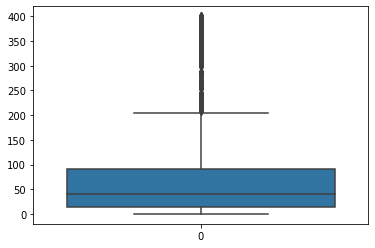

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df['AQI'])
plt.show()


In [90]:
import numpy as np

df['AQI'] = np.log1p(df['AQI'])  # Log transformation


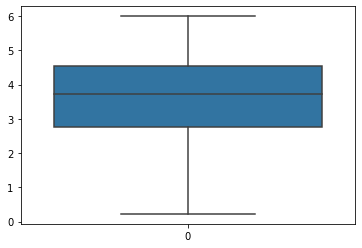

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df['AQI'])
plt.show()


In [92]:
from sklearn.model_selection import train_test_split

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [93]:
from sklearn.linear_model import LinearRegression

# Initialize model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R² Score: {r2}')


MAE: 0.5872904568257264
MSE: 0.5814043146353911
R² Score: 0.7046563795813007


In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate
y_pred_rf = rf_model.predict(X_test)
print(f"Random Forest R² Score: {r2_score(y_test, y_pred_rf)}")


Random Forest R² Score: 0.9493416183498872


In [96]:
train_pred_rf = rf_model.predict(X_train)
train_r2 = r2_score(y_train, train_pred_rf)
test_r2 = r2_score(y_test, y_pred_rf)

print(f"Training R² Score: {train_r2}")
print(f"Test R² Score: {test_r2}")


Training R² Score: 0.994432770226601
Test R² Score: 0.9493416183498872


In [97]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R² Score: {cv_scores.mean()}")


Cross-Validation R² Scores: [0.97494596 0.94778634 0.9781359  0.9648453  0.93784261]
Mean CV R² Score: 0.9607112240192045
